# Import bibliotek i ładowanie bibliotek

In [254]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import feature_selection
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('data_eda.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,pages,stars,reviews,series,mix,character,plot,funny,lighthearted,emotional,...,author_stars,Fiction,Nonfiction,Literary,Fantasy,Crime,Social,Children,Romans,Realism
0,273,4.00,2017,0,0.44,0.51,0.02,0.27,0.37,0.91,...,4.305000,1,1,0,0,0,1,0,1,1
1,302,3.78,7330,0,0.39,0.42,0.17,0.03,0.01,0.18,...,3.670000,1,0,0,0,1,0,0,0,0
2,400,4.15,16761,0,0.51,0.39,0.08,0.02,0.01,0.88,...,0.000000,1,0,1,0,0,0,0,0,0
3,459,4.16,2128,1,0.48,0.10,0.40,0.04,0.02,0.07,...,0.000000,1,0,0,1,0,0,0,0,0
4,160,3.65,6634,1,0.28,0.16,0.54,0.92,0.73,0.00,...,4.115000,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,432,4.15,30643,0,0.48,0.05,0.46,0.00,0.00,0.40,...,3.856667,1,0,0,1,1,0,0,0,0
6926,352,3.62,1058,0,0.55,0.13,0.30,0.15,0.10,0.25,...,3.700000,1,0,0,1,0,1,0,0,0
6927,535,3.88,30975,1,0.45,0.08,0.45,0.14,0.19,0.31,...,3.870000,1,0,0,1,0,0,1,0,0
6928,472,3.88,5914,1,0.64,0.12,0.22,0.07,0.00,0.36,...,3.660000,1,0,0,1,0,0,1,0,0


$\text{Posiłkując się informacjami z EDA przeprowadzimy Feature Engineering.}$<p>

In [242]:
categorical_features = ['series', 'Fiction', 'Nonfiction', 'Literary', 'Fantasy','Crime',
       'Social', 'Children', 'Romans', 'Realism']
target = "stars"
continous_features = df.columns.difference(categorical_features + [target]).tolist()
features=df.columns.difference([target]).tolist()

$\text{W pierwszym kroku sprawdzamy jak dostępne zmienne informują nas o zmiennej objaśnianej za pomocą mutual information.}$<p>

In [251]:
minfos_1={}

for var in features:
    minfos_1[var] = round(feature_selection.mutual_info_regression(df[var].values.reshape(-1,1),df[target].values)[0],20)
    
minfos_1=dict(sorted(minfos_1.items(), key=lambda item: item[1], reverse=True))
minfos_1

{'author_stars': 0.2879211118360212,
 'inspiring': 0.13141397573409908,
 'mix': 0.13097024123773338,
 'emotional': 0.11993401797851799,
 'hopeful': 0.11283966842587123,
 'mysterious': 0.09357000173033915,
 'challenging': 0.08242663223846503,
 'informative': 0.07956640462190467,
 'reflective': 0.0780884032516056,
 'plot': 0.07612021417435155,
 'character': 0.07152403762048465,
 'adventurous': 0.06704899935260134,
 'dark': 0.061363587574177814,
 'tense': 0.05212033273312233,
 'sad': 0.04803401580310141,
 'lighthearted': 0.04289647381111594,
 'reviews': 0.03818018934400702,
 'Nonfiction': 0.03153228190786006,
 'funny': 0.030657728449171803,
 'Fiction': 0.029505494963417256,
 'relaxing': 0.024259456863013007,
 'pages': 0.02415510984096692,
 'Social': 0.01750512103763624,
 'Romans': 0.011971432965578899,
 'Crime': 0.009899018048229014,
 'Fantasy': 0.007496025811463136,
 'author_count': 0.006446579523305295,
 'Literary': 0.004830719706637954,
 'Realism': 0.0019859471626402225,
 'Children': 0

$\text{Zmienne o bardzo niskiej wartości MI: Literary, Children, Realism oraz series.}$<p>

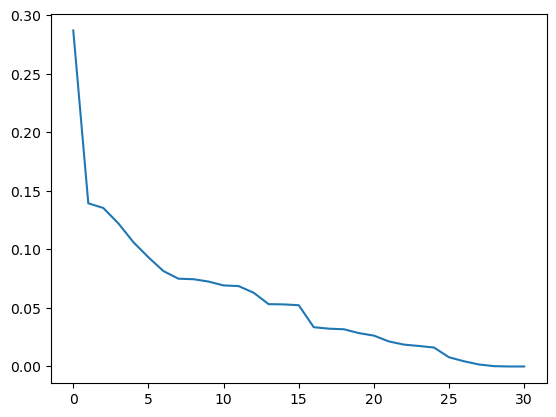

In [237]:
plt.plot(minfos_1.values())

$\text{Więc następnie zobaczymy czy przy interakcji zmiennych kategorycznych i numerycznych utworzymy zmienne, które dobrze wyjaśniają zmienna objaśnianą.}$<p>

In [238]:
df_added=df.copy()

In [246]:
import warnings
warnings.filterwarnings("ignore")

for category in categorical_features:
    for continous in continous_features:
        df_added["{}_{}".format(category,continous)]=df_added[category]*df_added[continous]
    
features_all=df_added.columns.difference([target]).tolist()

In [248]:
minfos_2={}

for var in features_all:
    minfos_2[var] = round(feature_selection.mutual_info_regression(df_added[var].values.reshape(-1,1),df_added[target].values)[0],20)
    
minfos_2=dict(sorted(minfos_2.items(), key=lambda item: item[1], reverse=True))
minfos_2

{'author_stars': 0.28873330287046794,
 'Fiction_author_stars': 0.22926827467624866,
 'Fiction_emotional': 0.13999718780945525,
 'inspiring': 0.13422952416863332,
 'mix': 0.13057927332530017,
 'Fiction_mix': 0.12512511710257535,
 'Fantasy_author_stars': 0.11150035305186412,
 'series_author_stars': 0.11017685740052974,
 'emotional': 0.10695496545380934,
 'hopeful': 0.10462880517077,
 'Fiction_mysterious': 0.09907487970415917,
 'mysterious': 0.09282424355634689,
 'Fiction_inspiring': 0.09238772524695404,
 'Literary_author_stars': 0.08941528982411562,
 'Fiction_hopeful': 0.08892328812744665,
 'challenging': 0.08185352873620744,
 'Social_author_stars': 0.07732225247888591,
 'Fiction_adventurous': 0.07549536658558775,
 'character': 0.07520735723075678,
 'Literary_inspiring': 0.07514114027640106,
 'adventurous': 0.07306057480443595,
 'Literary_emotional': 0.07282393297128209,
 'Fantasy_mix': 0.07215715703902781,
 'Fiction_plot': 0.07099599140092039,
 'Nonfiction_author_stars': 0.0696341547456

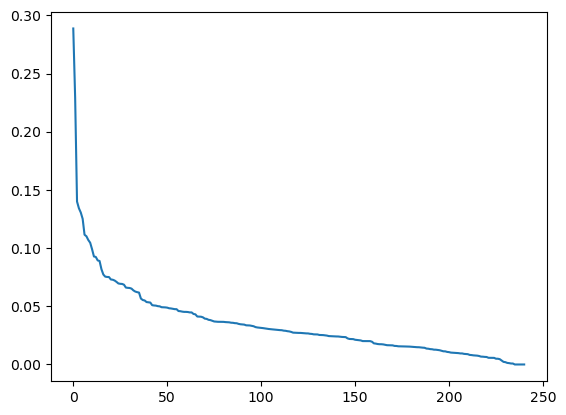

In [252]:
plt.plot(minfos_2.values())

$\text{Na podstawie analizy wykresu odetniemy zmienne z interakcją, które dodamy do zbioru na poziomie MI=0.05.}$<p>

In [253]:
categories=[]
for i,j in minfos_2.items():
    if j>0.05:
        categories.append(i)
print(categories)

['author_stars', 'Fiction_author_stars', 'Fiction_emotional', 'inspiring', 'mix', 'Fiction_mix', 'Fantasy_author_stars', 'series_author_stars', 'emotional', 'hopeful', 'Fiction_mysterious', 'mysterious', 'Fiction_inspiring', 'Literary_author_stars', 'Fiction_hopeful', 'challenging', 'Social_author_stars', 'Fiction_adventurous', 'character', 'Literary_inspiring', 'adventurous', 'Literary_emotional', 'Fantasy_mix', 'Fiction_plot', 'Nonfiction_author_stars', 'series_mix', 'Fiction_character', 'plot', 'Fiction_dark', 'Fiction_tense', 'reflective', 'informative', 'dark', 'Fiction_reflective', 'Nonfiction_challenging', 'Fiction_challenging', 'series_emotional', 'Literary_challenging', 'sad', 'Fiction_sad', 'Fiction_funny', 'series_inspiring', 'tense', 'Fantasy_inspiring', 'Fiction_pages', 'Nonfiction_emotional']


$\text{Po dodaniu zmiennych w interakcji widzimy, że zmienna series lepiej informuje o zmiennej objaśnianej w interakcji ze zmienną author_stars, mix, emotional oraz inspiring.}$<p>
$\text{Zmienna Literary sama mało informująca o wartości zmiennej objaśnianej w interkacji ze zmiennymi: author_stars, inspiring, emotional oraz challenging o wiele lepiej objaśnia zmienną.}$<p>
$\text{Niestety w przypadku zmiennych Children i Realism nie uzyskaliśmy tak wyraźnej nie uzyskaliśmy poprawy.}$<p>

In [ ]:
df_new=df_added.copy()
for column in df_added.columns:
    if column not in categories:
        df_new = df_new.drop(columns=[column])
cols_to_use = df_new.columns.difference(df.columns)
df = pd.merge(df, df_new[cols_to_use], left_index=True, right_index=True, how='outer')

$\text{Przechodząc do zmiennych ciągłych widzimy, że zmienne relaxing, reviews oraz pages nadal mało informują o zmiennej objaśniającej.}$<p>
$\text{Znając ich rozkłady z EDA wiemy, że relaxing jest prawostronnie skośny, tak samo jak reviews, a zmienna pages również ma długi prawy ogon.}$<p>
$\text{Zaczniemy więc od transformacji logarytmicznej.}$<p>

In [226]:
df_log=df.copy()
for column in continous_features:
    df_log["{}_log".format(column)]=np.log(df_log[column].replace(0, np.nan))
    df_log["{}_log".format(column)]=df_log["{}_log".format(column)].replace(np.nan,0)

features_log=df_log.columns.difference(features_all+[target] + ["author"]).tolist()

minfos_3={}

for var in features_log+continous_features:
    minfos_3[var] = round(feature_selection.mutual_info_regression(df_log[var].values.reshape(-1,1),df_log[target].values)[0],20)
    
minfos_3=dict(sorted(minfos_3.items(), key=lambda item: item[1], reverse=True))
minfos_3

{'inspiring': 0.1464123709651508,
 'mix_log': 0.1272072420565813,
 'mix': 0.12676104607964422,
 'inspiring_log': 0.1266286568324526,
 'emotional': 0.12161099081731663,
 'emotional_log': 0.11762336005087626,
 'hopeful_log': 0.10942655012221092,
 'hopeful': 0.10696459368205247,
 'mysterious_log': 0.09295548515209884,
 'mysterious': 0.09031051590369987,
 'reviews_log': 0.08896378161169682,
 'adventurous_log': 0.08093628576917489,
 'informative': 0.07654862490753578,
 'character_log': 0.07474494127084697,
 'challenging': 0.07388780871209821,
 'challenging_log': 0.07383558646642285,
 'plot_log': 0.07228897578262128,
 'plot': 0.07142047861261602,
 'adventurous': 0.06920395106605604,
 'informative_log': 0.06560943821962217,
 'reflective': 0.06475659278272072,
 'reflective_log': 0.06449736820976515,
 'character': 0.06398787932786565,
 'dark': 0.06285404811942286,
 'dark_log': 0.061819899754933516,
 'funny_log': 0.05966053903573876,
 'sad': 0.05694277370829059,
 'sad_log': 0.05120492586139313,


$\text{Poprawa jedynie dla zmiennych: reviews_log, adventurous_log, character_log, sad_log, lighthearted_log, lecz dla zmiennej reviews znaczna.}$<p>
$\text{Użyjemy dlatego bardziej zaawansowanych transformacji zmiennych, gdyż nadal większość zmiennych ciągłych ma rozkład prawostronny.}$<p>
$\text{Mianowicie metod: Boxcox, Standard Scaler, Robust Scaler, MinMaxScaler, QuantileTransformer.}$<p>